### 📦 Import Required Libraries
- Import PyTorch for building and training the neural network.
- NumPy is used for data creation, and Matplotlib for visualization.


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

###  Generate Synthetic 3-Variable Non-linear Data
- Creates 100 samples with 3 input features and a non-linear target using a quadratic equation.
- Adds Gaussian noise to simulate realistic data variation.


In [2]:
# === Generate 3-variable non-linear regression data ===
np.random.seed(42)

# Generate 100 samples of 3 features (X1, X2, X3)
X = np.random.rand(100, 3).astype(np.float32)

# Target: non-linear function of all 3 variables + noise
y = (X[:, 0]**2 + X[:, 1]**2 + X[:, 2]**2 + np.random.randn(100) * 0.05).astype(np.float32).reshape(-1, 1)


### Convert NumPy Arrays to PyTorch Tensors
- Prepares the data for use with PyTorch by converting NumPy arrays into tensor format.


In [3]:
# Convert numpy arrays to torch tensors
X_train = torch.from_numpy(X)
y_train = torch.from_numpy(y)

### Define a 3-Layer Neural Network from Scratch
- Initializes weights and biases manually for two hidden layers and one output layer.
- Uses einsum for tensor operations instead of built-in PyTorch layers.


In [4]:
# 3-layer neural network from scratch in PyTorch
class SimpleNN(torch.nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Manually initialize weights and biases for each layer
        self.W1 = torch.nn.Parameter(torch.randn(1, 5, dtype=torch.float32))  # Input to hidden layer weights
        self.b1 = torch.nn.Parameter(torch.zeros(1, 5, dtype=torch.float32))  # Bias for hidden layer

        self.W2 = torch.nn.Parameter(torch.randn(5, 5, dtype=torch.float32))  # Hidden to hidden layer weights
        self.b2 = torch.nn.Parameter(torch.zeros(1, 5, dtype=torch.float32))  # Bias for hidden layer

        self.W3 = torch.nn.Parameter(torch.randn(5, 1, dtype=torch.float32))  # Hidden to output layer weights
        self.b3 = torch.nn.Parameter(torch.zeros(1, 1, dtype=torch.float32))  # Bias for output layer

    def forward(self, x):
        # First hidden layer with ReLU
        a1 = torch.einsum('bi,ij->bj', x, self.W1) + self.b1
        h1 = torch.relu(a1)

        # Second hidden layer with ReLU
        a2 = torch.einsum('bi,ij->bj', h1, self.W2) + self.b2
        h2 = torch.relu(a2)

        # Output layer
        a3 = torch.einsum('bi,ij->bj', h2, self.W3) + self.b3
        return a3

# Instantiate the network
model = SimpleNN()

### Define Mean Squared Error (MSE) Loss Function
- Implements a custom loss function to measure prediction error.
- Calculates the average squared difference between predicted and true outputs.


In [5]:
# Loss function (Mean Squared Error)
def compute_loss(y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

### Train the Neural Network
- Performs forward pass, computes the loss, runs backpropagation, and updates parameters.
- Records and prints training loss every 100 epochs to monitor progress.


In [6]:
# Training loop
epochs = 1000
learning_rate = 0.01
losses = []

for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = compute_loss(y_pred, y_train)
    losses.append(loss.item())  # Append loss value to track it

    # Backward pass and optimize
    model.zero_grad()  # Clear previous gradients
    loss.backward()    # Backpropagation to compute gradients

    # Update weights and biases manually
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 3.3521814346313477
Epoch 100, Loss: 0.303223580121994
Epoch 200, Loss: 0.2864745557308197
Epoch 300, Loss: 0.2861799895763397
Epoch 400, Loss: 0.28617480397224426
Epoch 500, Loss: 0.2861746847629547
Epoch 600, Loss: 0.2861746847629547
Epoch 700, Loss: 0.2861746847629547
Epoch 800, Loss: 0.2861746847629547
Epoch 900, Loss: 0.2861746847629547


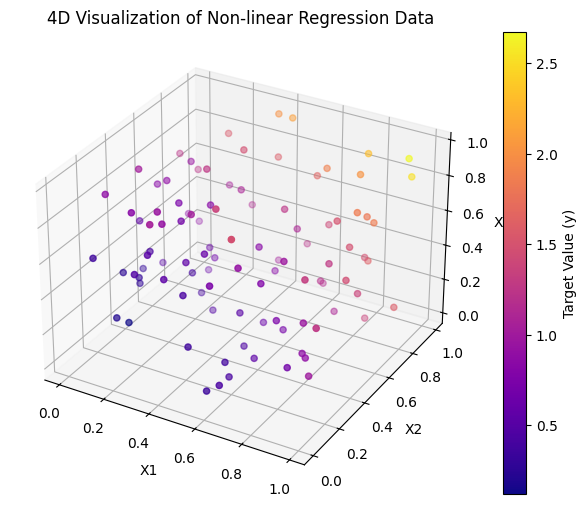

In [7]:
# === 4D Plot: x1, x2, x3 as position, y as color ===
from mpl_toolkits.mplot3d import Axes3D

X_np = X  # original numpy input
y_np = y  # original target

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X_np[:, 0], X_np[:, 1], X_np[:, 2], c=y_np[:, 0], cmap='plasma')
plt.colorbar(sc, ax=ax, label='Target Value (y)')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")
ax.set_title("4D Visualization of Non-linear Regression Data")
plt.show()


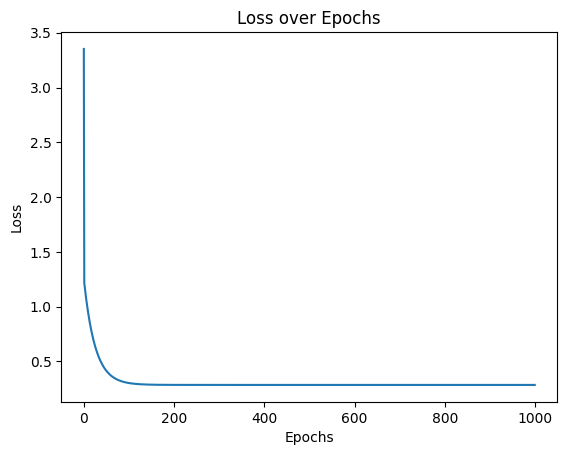

In [8]:
# Plotting the loss curve
plt.plot(losses)
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

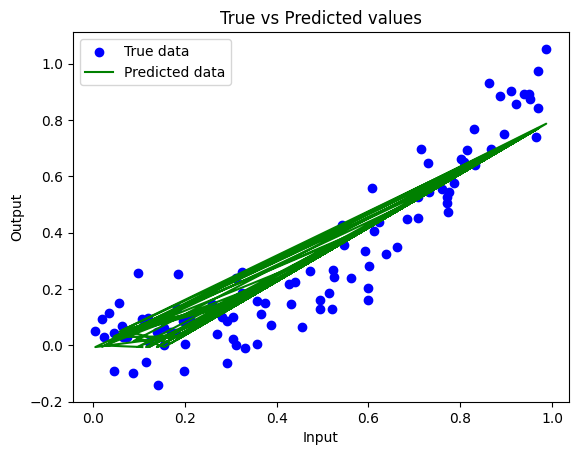

In [ ]:
# Plotting the predictions vs true values
y_pred = model(X_train).detach().numpy()  # Get predictions from model
plt.scatter(X, y, color='blue', label='True data')
plt.plot(X, y_pred, color='green', label='Predicted data')
plt.title('True vs Predicted values')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()